## BONUS: Los Taxis de Nueva York

Vamos a trabajar con un dataset real: el dataset de los taxis de Nueva York. Este dataset contiene información sobre los viajes en taxi en Nueva York, como la fecha y hora del viaje, la duración del viaje, la distancia recorrida, etc.

Carga el dataset de los taxis de Nueva York y muestra las primeras 5 filas.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
taxis_df = sns.load_dataset("taxis")
taxis_df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


Responde a las siguientes preguntas:

- ¿Cómo se distribuyen las distancias de los viajes?
- ¿Cuál es la relación entre la distancia del viaje y la tarifa?
- ¿Cuál es el promedio de las propinas por cada zona de recogida?
- ¿Cuál es la cantidad de pasajeros por barrio (borough) de recogida?
- ¿Hay alguna relación entre el número de pasajeros y la tarifa total? 
- ¿Qué métodos de pago (payment) son los más comunes? 
- ¿Cómo varían las tarifas según el barrio de recogida?
- ¿Qué método de pago recibe las mayores propinas?
- ¿Hay diferencias en las tarifas totales dependiendo del color del taxi?
- ¿Cuánto se paga en peajes según el borough de destino?
- ¿Cuál es la distancia media de los viajes según el borough de destino ? 

¿Cómo se distribuyen las distancias de los viajes?

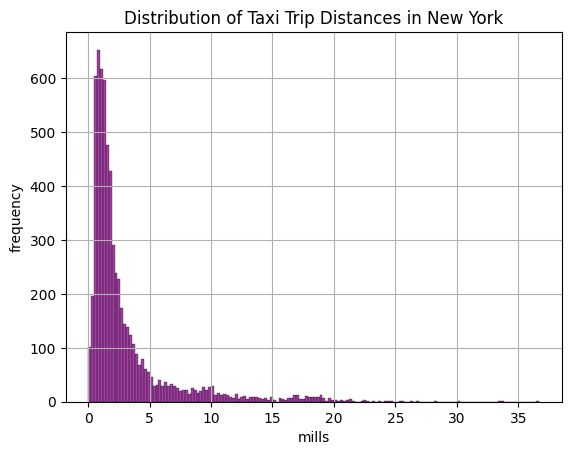

In [3]:
sns.histplot(data=taxis_df, x="distance", color='purple')
plt.title('Distribution of Taxi Trip Distances in New York')
plt.xlabel('mills')
plt.ylabel('frequency')
plt.grid(True)


¿Cuál es la relación entre la distancia del viaje y la tarifa?

Text(0.5, 1.0, 'fare and distance')

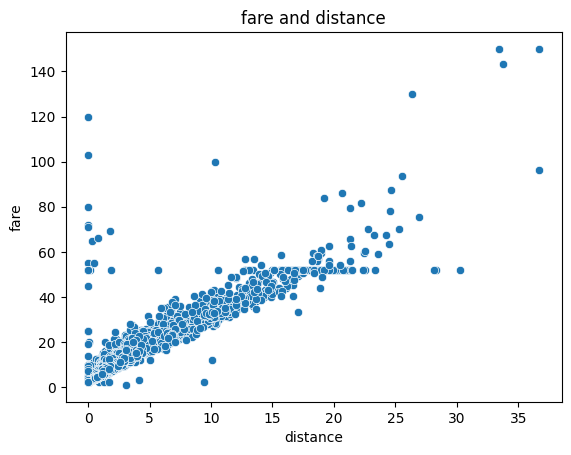

In [4]:
sns.scatterplot(data=taxis_df, x="distance", y="fare")
plt.title('fare and distance')

¿Cuál es el promedio de las propinas por cada zona de recogida?

Queens suele destacar por sus propinas, pero llama la atención las propinas de la zona Bronx_Park.... ¿que tipo de servicios se prestarán en esta zona para que las propinas sean tan generosas?
(hay que tener en cuenta, que el cine nos ha llenado de estereotipos)


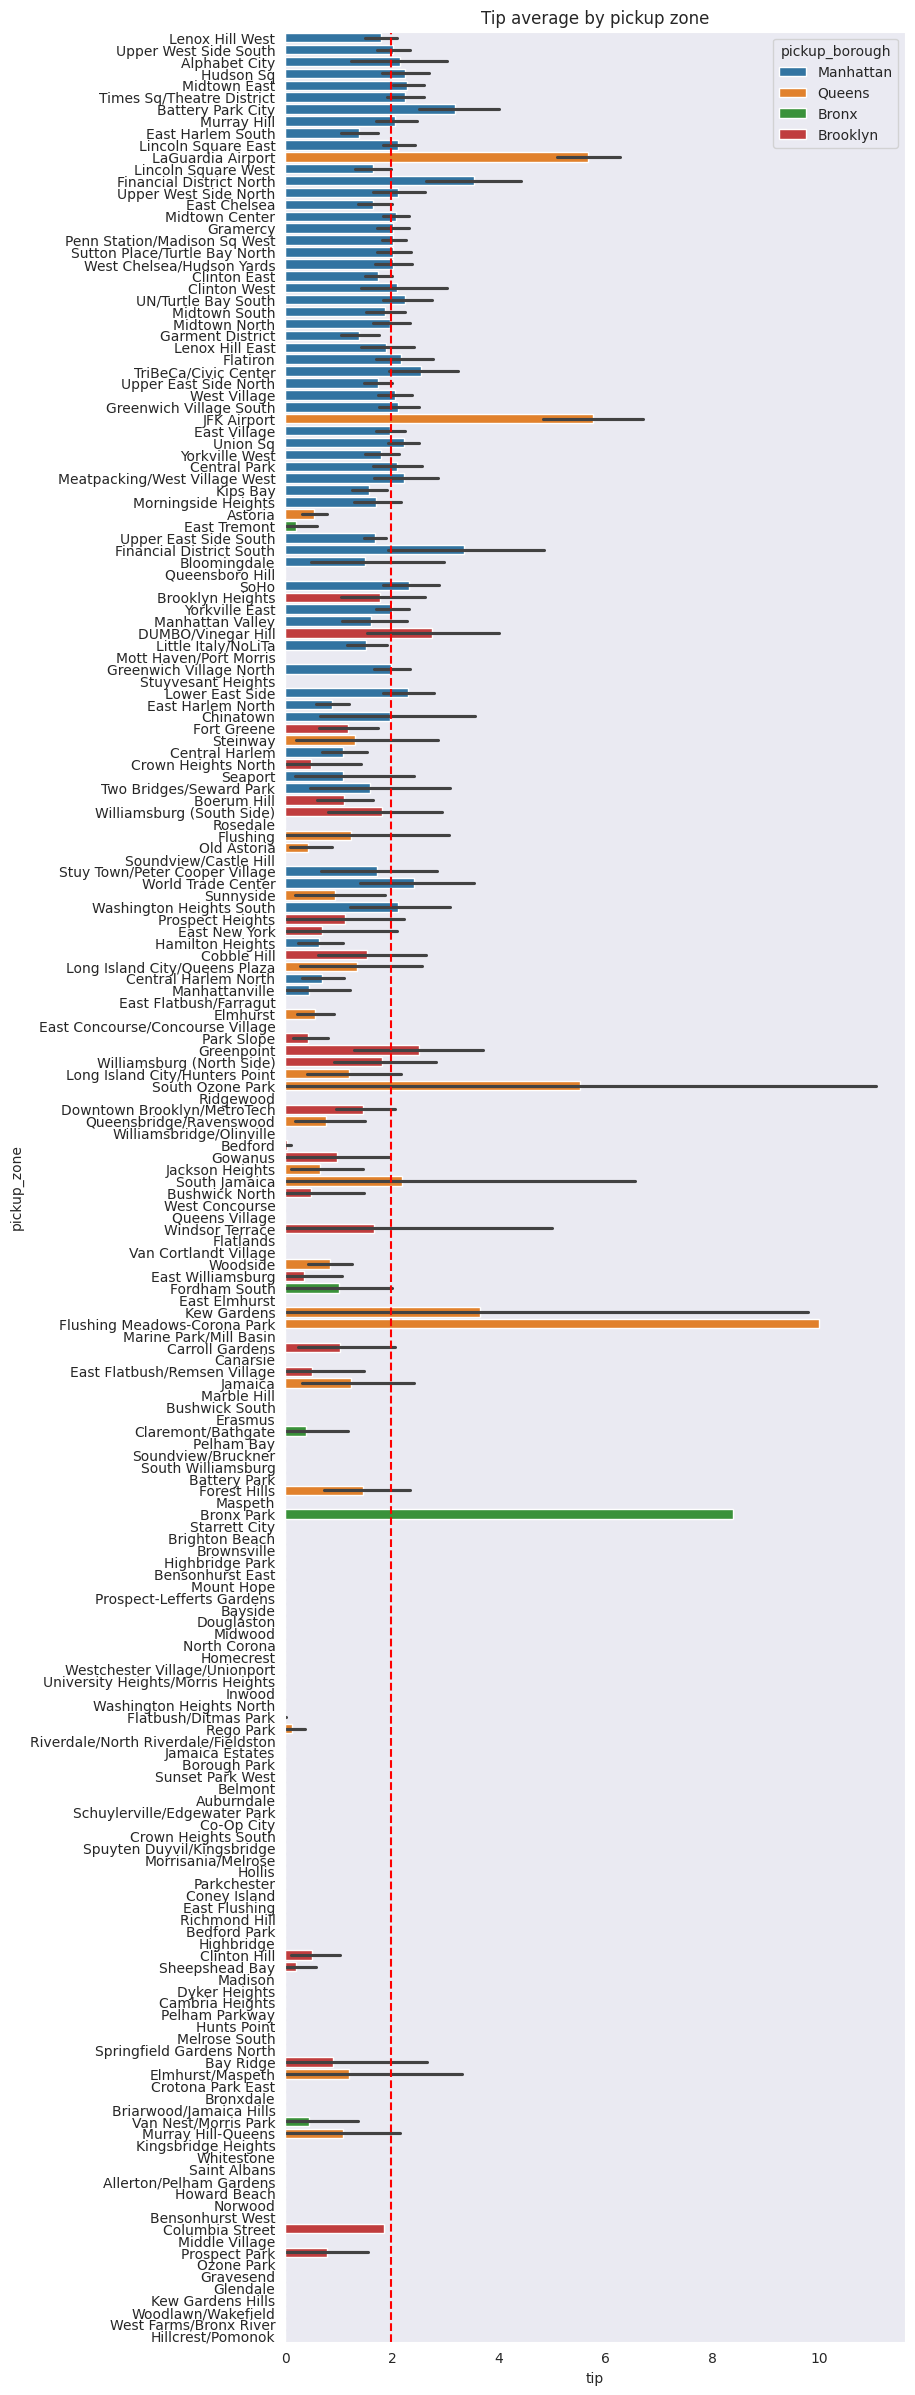

In [29]:
fig = plt.figure(figsize=(8, 30)) 
tip_Avg = taxis_df['tip'].mean()
sns.barplot(data=taxis_df, y="pickup_zone", x="tip", hue="pickup_borough")
plt.title('Tip average by pickup zone')
plt.axvline(tip_Avg, color='red', linestyle='--')
print("Queens suele destacar por sus propinas, pero llama la atención las propinas de la zona Bronx_Park.... ¿que tipo de servicios se prestarán en esta zona para que las propinas sean tan generosas?")
print("(hay que tener en cuenta, que el cine nos ha llenado de estereotipos)")

¿Cuál es la cantidad de pasajeros por barrio (borough) de recogida?

En la gráfica se denota que Manhattan es el municipio de NY con más usuarios del servicio


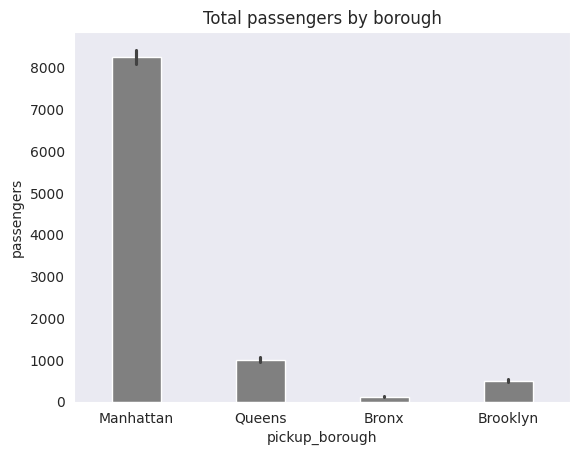

In [31]:
sns.barplot(data=taxis_df, x="pickup_borough", y="passengers", estimator=sum, width=0.4,  color='grey')
sns.set_style('dark') 
plt.title('Total passengers by borough')
print("En la gráfica se denota que Manhattan es el municipio de NY con más usuarios del servicio")

¿Hay alguna relación entre el número de pasajeros y la tarifa total?

No se observa relación entre el importe del viaje al número de pasajeros


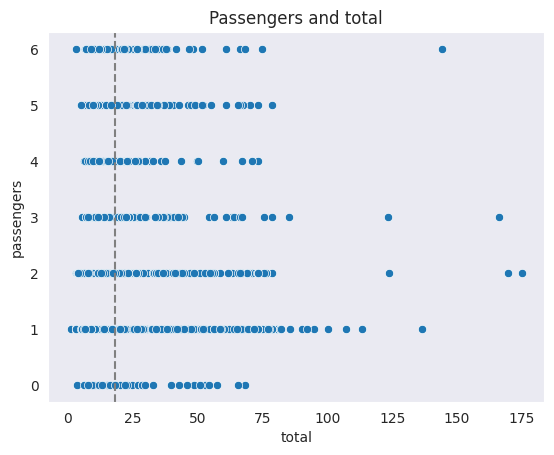

In [7]:
total_Avg = taxis_df['total'].mean()
sns.scatterplot(data=taxis_df, x="total", y="passengers")
plt.axvline(total_Avg, color='grey', linestyle='--')
plt.title('Passengers and total')
print("No se observa relación entre el importe del viaje al número de pasajeros")


¿Qué métodos de pago (payment) son los más comunes? 

El pago con tarjeta es el más utilizado frente al pago en efectivo


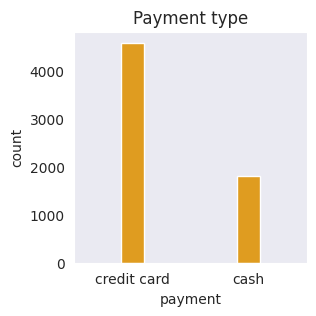

In [8]:
fig = plt.figure(figsize=(3, 3)) 
sns.countplot(x="payment", data=taxis_df, width=0.2, color="orange")
plt.title('Payment type')
print("El pago con tarjeta es el más utilizado")


¿Cómo varían las tarifas según el municipio de recogida?

<Axes: xlabel='pickup_borough', ylabel='fare'>

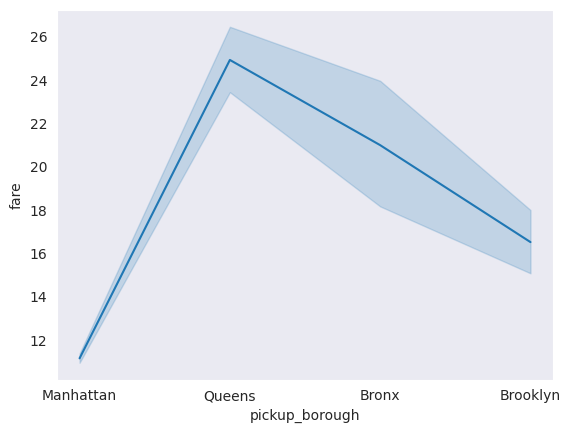

In [25]:
sns.lineplot(x="pickup_borough", y="fare", data=taxis_df)

¿Qué método de pago recibe las mayores propinas?

Curiosamente, no existen propinas en el pago en efectivo.  Tambien puede ocurrir que sí existen, pero no la declaran


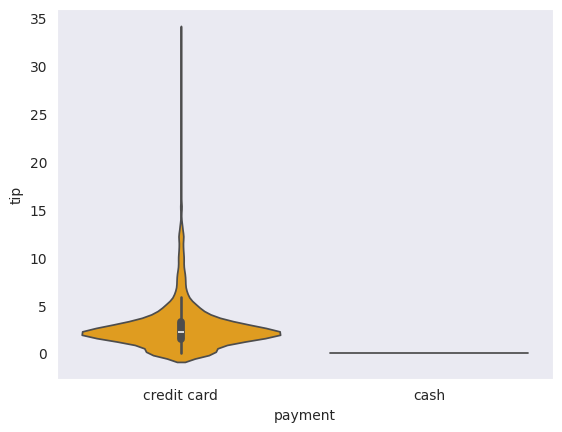

In [27]:
sns.violinplot(data=taxis_df, x="payment", y="tip", color="orange")
print("Curiosamente, no existen propinas en el pago en efectivo.  Tambien puede ocurrir que sí existen, pero no la declaran")

¿Hay diferencias en las tarifas totales dependiendo del color del taxi?

<Axes: xlabel='color', ylabel='total'>

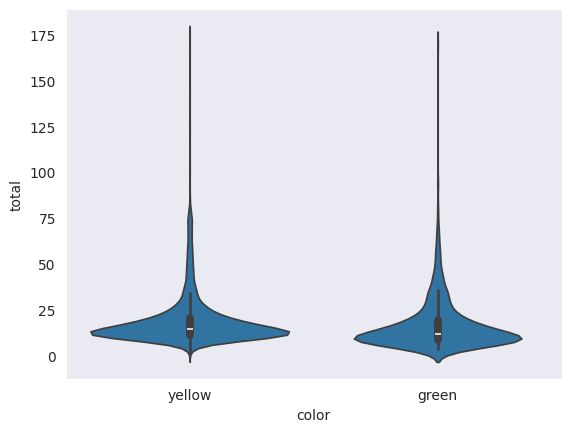

In [65]:
sns.violinplot(x="color", y="total", data=taxis_df)

¿Cuánto se paga en peajes según el borough de destino?

<Axes: xlabel='dropoff_borough', ylabel='tolls'>

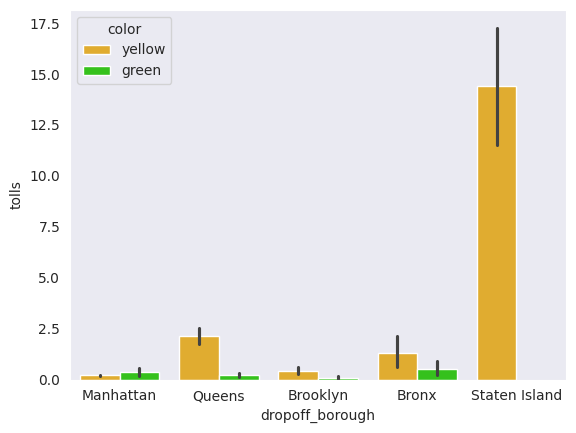

In [111]:
colores= ["#fdb813", "#22dc00"]
sns.barplot(data=taxis_df, x="dropoff_borough", y="tolls", hue="color", palette=colores)

¿Cuál es la distancia media de los viajes según el borough de destino ?

<Axes: xlabel='dropoff_borough', ylabel='distance'>

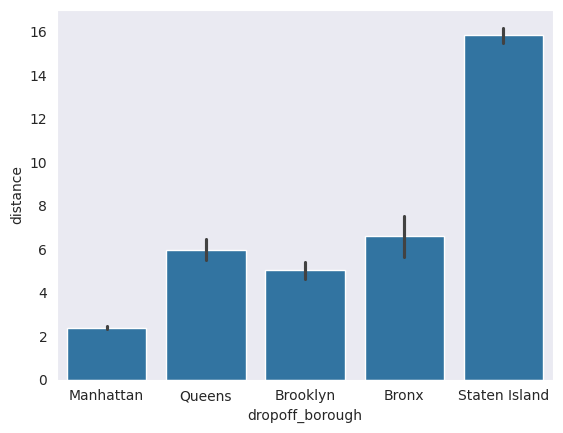

In [119]:
sns.barplot(data=taxis_df, x="dropoff_borough", y="distance")

Distancias recorridas de lunes a domingos (sin ordenar jajaja) digregados por taxis amarillo y verdes

Text(0.5, 1.0, 'Green Taxis')

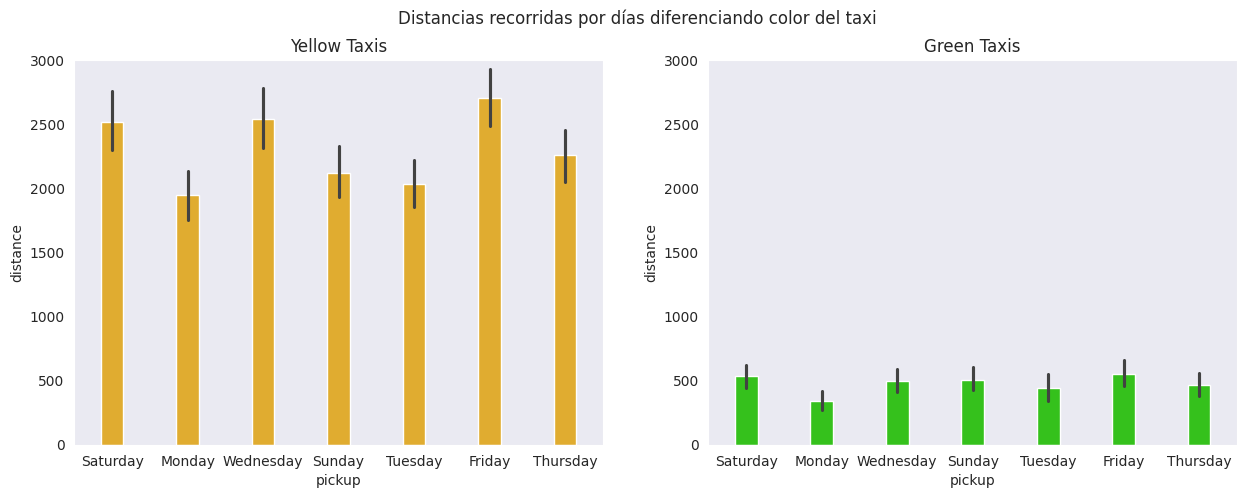

In [112]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle("Distancias recorridas por días diferenciando color del taxi")

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_ylim(0, 3000)
ax2.set_ylim(0, 3000)

taxis_yellow_df = taxis_df[taxis_df['color'] == "yellow"]
taxis_green_df = taxis_df[taxis_df['color'] == "green"]
day_travel=taxis_df['pickup'].dt.strftime('%A')


sns.barplot(data=taxis_yellow_df, x=day_travel, y="distance", estimator=sum, width=0.3, color="#fdb813", ax=ax1)
sns.barplot(data=taxis_green_df, x=day_travel, y="distance", estimator=sum, width=0.3, color = "#22dc00", ax=ax2)

ax1.set_title('Yellow Taxis')
ax2.set_title('Green Taxis')